0 __header__
1 __version__
2 __globals__
3 sv
0 __header__
1 __version__
2 __globals__
3 sv
The experiment is SVC(cache_size=500) 

The shape of X_train is (72000, 8) 

The train time is --- 51.81696796 seconds ---
The test time is --- 33.48592091 seconds ---


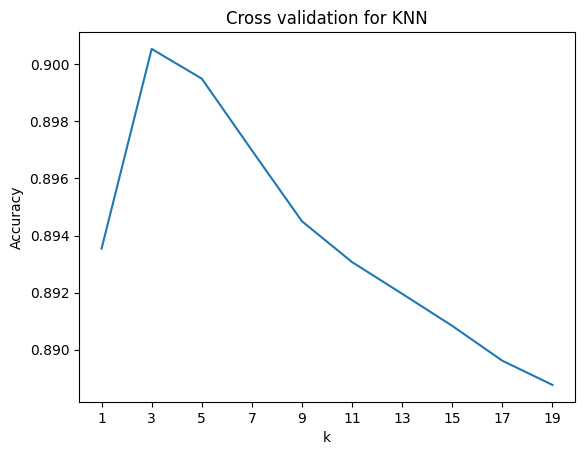

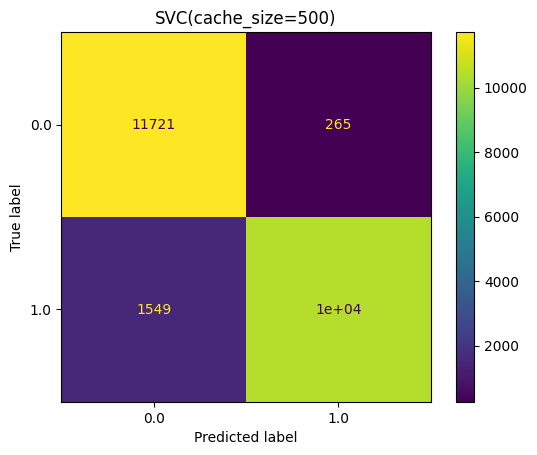

The experiment is KNeighborsClassifier(n_neighbors=3) 

The shape of X_train is (72000, 8) 

The train time is --- 0.18764138 seconds ---
The test time is --- 1.04327154 seconds ---


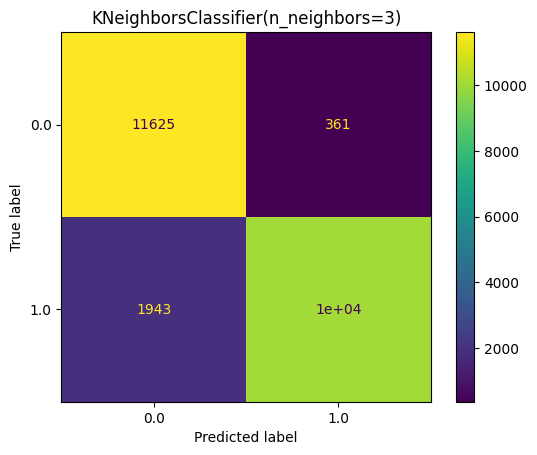

The experiment is AdaBoostClassifier(n_estimators=100, random_state=0) 

The shape of X_train is (72000, 8) 

The train time is --- 6.84061933 seconds ---
The test time is --- 0.20989609 seconds ---


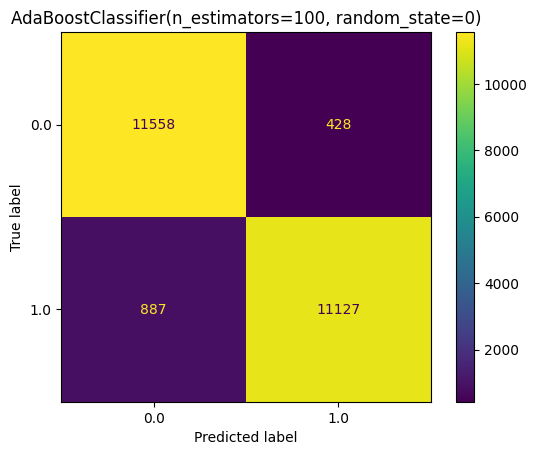

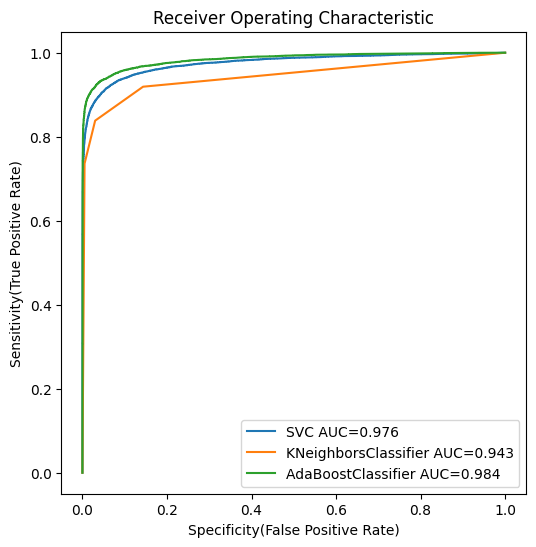

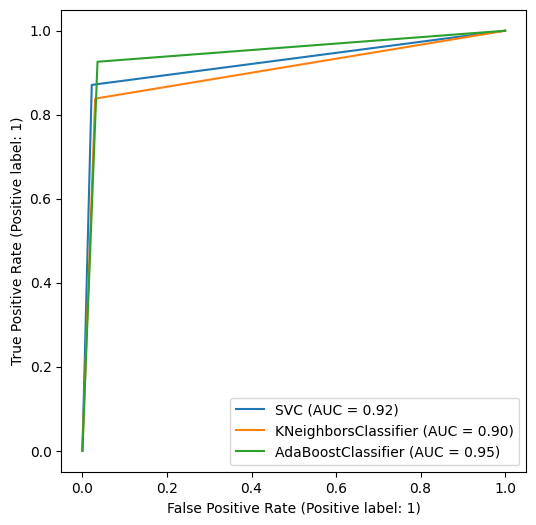

In [1]:
"""Classifiers comparision"""
# SEP 786 Project report
# Yu Zhang         400429707
# Xiaoyu Jiang     400057533
# Mingming Zhang   400349051

from sklearn.preprocessing import StandardScaler
import sys
import matplotlib.pyplot as plt
import numpy as np
import sklearn.discriminant_analysis
from sklearn import svm
import pandas as pd

from function_plot import Load_mat_single
from function_plot import mat_to_array
from function_plot import plot_confusion_matrix
from function_plot import train_test
from function_plot import roc
from function_plot import roc_comp

import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn import model_selection
from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve

np.random.seed(10)
random_state = np.random.RandomState(10)

"""Load Data"""
# Path
path_good = 'data//baseline_20220915_sv.mat'
path_bad= 'data//fault7_20220915_sv.mat'
# Load the .mat files
mat_contents_good = Load_mat_single(path_good)
mat_contents_bad = Load_mat_single(path_bad)

# Convert to Numpy array
good_data = mat_to_array(mat_contents_good)
bad_data = mat_to_array(mat_contents_bad)

# Debug flag about time
show_time = True

"""Construct the data"""
# Merge the data
# constuct the data

X= np.concatenate((good_data, bad_data))

# Create the label
n_sample = good_data.shape[0]


Y = np.zeros(n_sample)
Y = np.concatenate((Y, np.ones(n_sample)))



"""Category the data"""

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=random_state)

# -------------- Perform cross-validation--------------



# find best gamma for Support vector machines

# gamma_range = np.logspace(-3, 3, 20)
# param_grid = dict(gamma=gamma_range)
# cv = StratifiedShuffleSplit(
# 	n_splits=5, test_size=0.2, random_state=random_state)
# grid = GridSearchCV(svm.SVC(cache_size=500), param_grid=param_grid, cv=cv)
# grid.fit(X_train, Y_train)

# best_gamma = grid.best_params_['gamma']
# test_score = grid.cv_results_['mean_test_score']

# plt.figure()
# plt.plot(gamma_range,test_score)
# plt.xlabel('gamma')
# plt.ylabel('Accuracy')
# plt.title('Cross validation for SVM')


# K-Nearest Neighbours

neigh_accuracy = []

neigh = []
k_candidate = []

# find optimal k values
# estm_k_neigh =[5,10,15,20]
estm_k_neigh = 20
for i in range(estm_k_neigh):

    if i % 2 != 0:
        knn =  KNeighborsClassifier(n_neighbors=i)

        neigh.append(knn)
        cv_scores = cross_val_score(knn, X_train, Y_train, cv=5)
        neigh_accuracy.append(cv_scores.mean())
        k_candidate.append(i)


neigh_accuracy_max = max(neigh_accuracy)

max_index = neigh_accuracy.index(neigh_accuracy_max)
best_k = k_candidate[max_index]

plt.figure()
plt.plot(k_candidate,neigh_accuracy)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Cross validation for KNN')
plt.xticks(k_candidate)


# -------------- Confusion matrix and time --------------

"""SVM"""

clf_svm = svm.SVC(cache_size=500,)
#  gamma=best_gamma
error_SVM, prediction_svm, train_time, test_time = train_test(
    X_train, Y_train, X_test, Y_test,  clf_svm, show_time)


plot_confusion_matrix(Y_test, prediction_svm, clf_svm )



"""K Nearest Neighbors"""

clf_KNN = KNeighborsClassifier(n_neighbors=best_k)

error_KNN, prediction_KNN, train_time, test_time = train_test(
    X_train, Y_train, X_test, Y_test,  clf_KNN, show_time)


plot_confusion_matrix(Y_test, prediction_KNN, clf_KNN)



""" Adaboost"""
clf_ab = AdaBoostClassifier(n_estimators=100, random_state=0)

error_ab, prediction_ab, train_time, test_time = train_test(
    X_train, Y_train, X_test, Y_test,  clf_ab, show_time)


plot_confusion_matrix(Y_test, prediction_ab, clf_ab)


# -------------- ROC Curve--------------

fig, ax = plt.subplots(figsize=(6, 6))

clfs = [clf_svm, clf_KNN, clf_ab]
for  clf in clfs:
    if clf==clf_KNN:

        fpr, tpr, _ = roc_curve(Y_test, clf.predict_proba(X_test)[:, 1])
        
        
    else:
        fpr, tpr, _ = roc_curve(Y_test, clf.decision_function(X_test))
        
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='{} AUC={}'.format(
        (str(clf).split('(')[0]), round(roc_auc, 3)))
plt.xlabel('Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')



fig, ax = plt.subplots(figsize=(6, 6))

Pres = [prediction_svm, prediction_KNN, prediction_ab]
for i, Pre in enumerate(Pres):
    
     RocCurveDisplay.from_predictions(

        Y_test,
        Pre,
        ax=ax,
        name=str(clfs[i]).split('(')[0]
       
    )















